# Wstęp do uczenia maszynowego
## Praca domowa nr. 6
### Autorzy: Jan Skwarek, Daniel Tytkowski

Najpierw wczytajmy niezbędne pakiety.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import copy
warnings.filterwarnings('ignore')

Wczytajmy dane i sprawdźmy jak wyglądają.

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 36.2+ KB


In [4]:
data.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Należy zakodować zmienną 'famhist'. Wyrzućmy też od razu zmienną celu 'chd' - możemy sobie wyobrazić, że PCA, które robimy w tej pracy domowej ma służyć później klasterowaniu.

In [5]:
y = np.array(data['chd'])
X = data.drop(['chd'],axis=1)
map_dict = {'Present': 1, 'Absent':0}
X['famhist'] = X['famhist'].map(map_dict)
X.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49


In [6]:
X.describe()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000


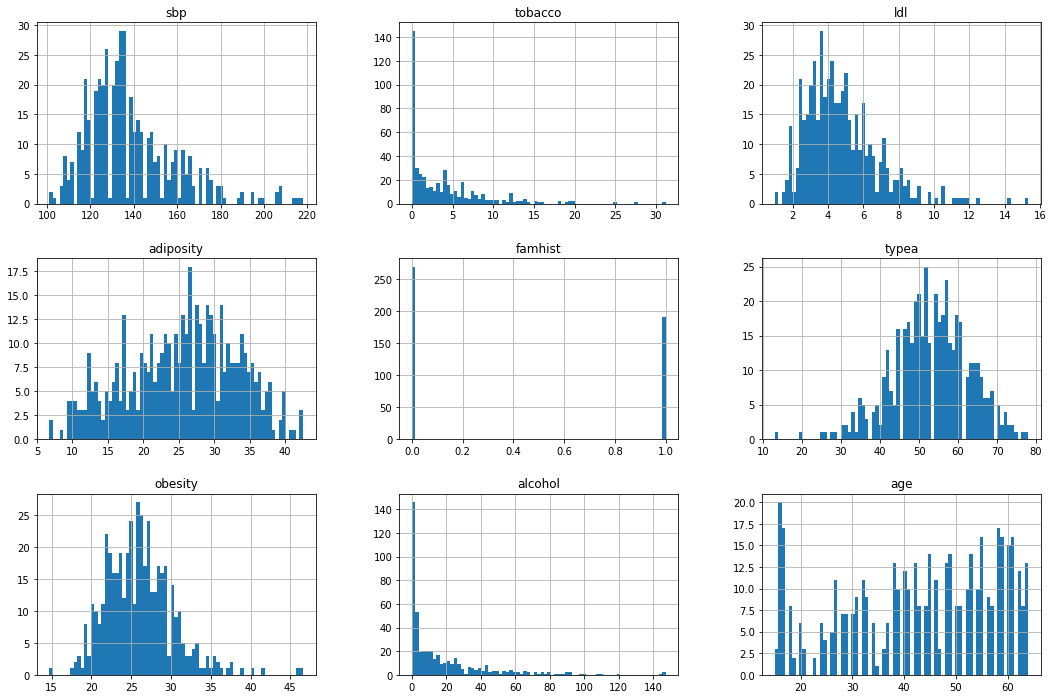

In [7]:
X.hist(bins = 73, figsize=(18, 12))
plt.show()

Ten zbiór danych był już przez nas wielokrotnie używany i analizowany na zajęciach. Przejdźmy więc do właściwego zadania.

## Zadanie 1
Graficzne przedstawienie korelacji przy użyciu biblioteki Seaborn.

Przedstawmy korelację przy użyciu Seaborn'a na pierwszy sposób:

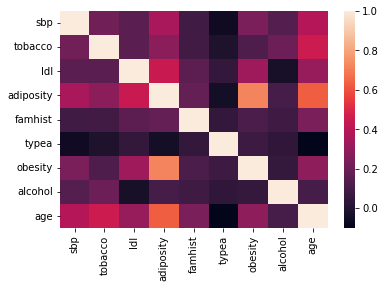

In [8]:
sns.heatmap(X.corr());

Nie wygląda to jednak zbyt dobrze. Po co nam elementy nad diagonalą skoro macierz jest symetryczna? Pozbądźmy się ich w celu uzyskania większej czytelności. Ponadto zmodyfikujmy nieco rozmiar obrazka. Zmieńmy też kolory na nieco bardziej intuicyjne.

<AxesSubplot:>

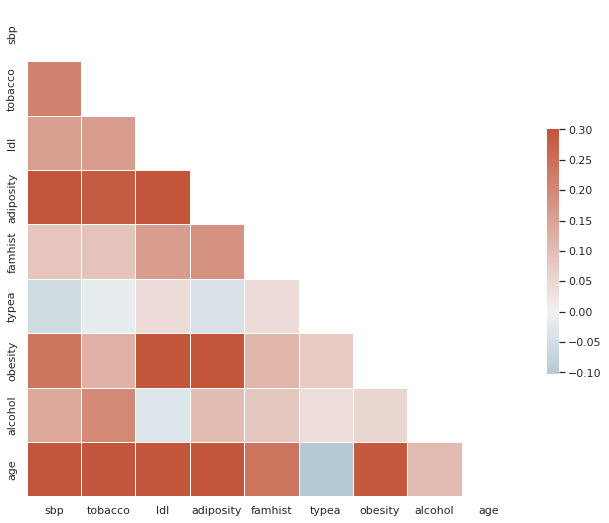

In [9]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Spróbujmy uzyskać nieco zimniejsze kolory. Ponadto chcemy mieć dokładne wartości liczbowe w polach.

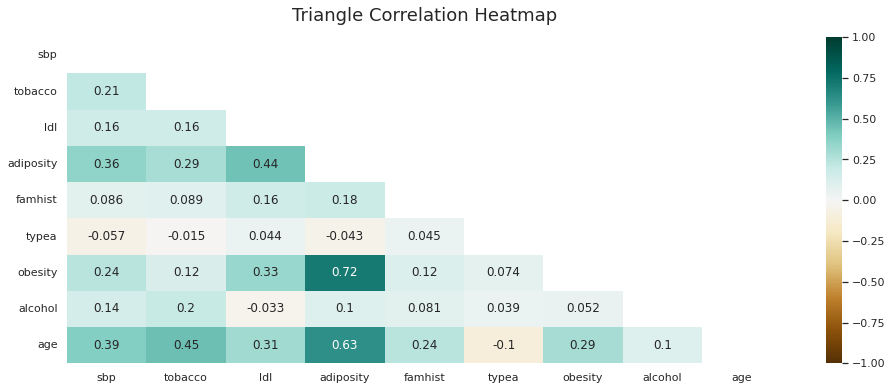

In [10]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))
heatmap = sns.heatmap(X.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Z tak wygenerowanych heatmap można odczytać prawie wszystko o korelacjach zmiennych! Przykładowo widzimy, że najbardziej skorelowane są ze sobą zmienne 'adiposity' i 'obesity'. Jest to jak najbardziej zgodne z naszą intuicją. 'adiposity' mocno koreluje też z wiekiem. Pojawiły się jak widać również korelacje ujemne.

Warto dodać, że domyślna metoda liczenia korelacji dla pandasowego .corr() to współczynnik korelacji Pearson'a. Można oczywiście zmienić metodę na metodę Kendall'a czy Spearman'a. W naszym zbiorze danych nie ma żadnych zmiennych kategorycznych będących stringami, dlatego każda z powyższych metod zadziała. Gdyby jednak takie zmienne były, to musielibyśmy sięgnąć po inne rozwiązania, przykładowo analizę chi-square. Wyplotujmy sobie jeszcze tą jedną ostatnią heatmapę z innymi metodami liczenia korelacji.

Ostatnia heatmapa, tylko że z korelacją liczoną metodą Kendall'a.

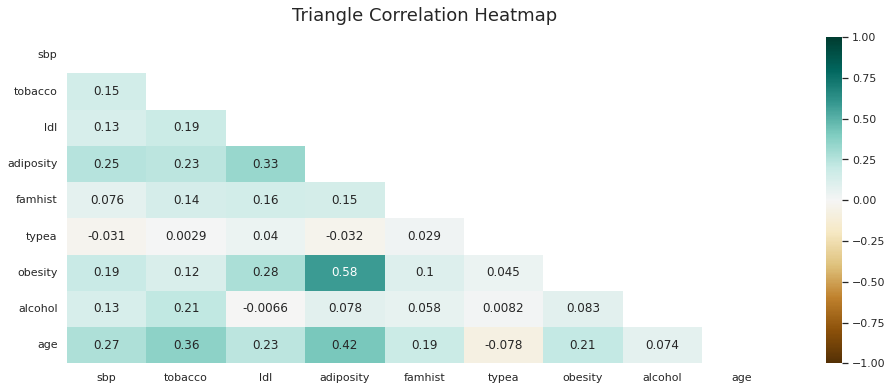

In [11]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))
heatmap = sns.heatmap(X.corr(method='kendall'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Ostatnia heatmapa, tylko że z korelacją liczoną metodą Spearman'a.

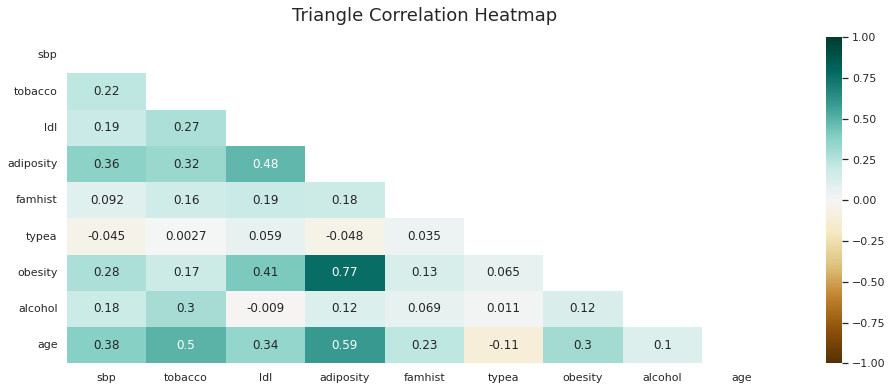

In [12]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(X.corr(), dtype=np.bool))
heatmap = sns.heatmap(X.corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

Wnioski są podobne. Celem tego ćwiczenia nie jest jednak zbadanie różnic w danych metodach. Dla ciekawostki podsyłam jednak stronkę, na której są one w dość przystępny sposób wypunktowane (zarówno intuicyjnie jak i matematycznie) - https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/correlation-pearson-kendall-spearman/.

## Zadanie 2
Przeprowadzenie PCA (Principal Component Analysis).
Z uwzględnieniem:
1. w ramach prac należy przedstawić wektory własne oraz wartości własne (wykres biplot)
2. wyniki PCA wraz z argumentację dlaczego taka liczba PC a nie inna została wybrany, potwierdzona wykresem, metryką, itp.

Przed PCA należy oczwyście znormalizować wartości zmiennych, aby miały:
1. zerową średnią
2. wariancję jednostkową

To w zasadzie robi StandardScaler z biblioteki sklearn. Oczywiście są inne metody skalowania zmiennych, ale w naszym przypadku ta będzie zdecydowanie najlepsza, bo:
1. sklearn Normalizer nie gwarantuje zerowej średniej
2. skalowania Min-Max nie gwarantują jednostkowej wariancji
3. Robust scaler nie zadziała na wszystkich typach danych

StandardScaler to w naszym wypadku najbezpieczniejsza i najbardziej standardowa opcja. Znormalizujmy więc dane, zróbmy PCA i zwizualizujmy sobie wektory własne oraz wartości własne.

Możemy to zrobić w ten sposób:

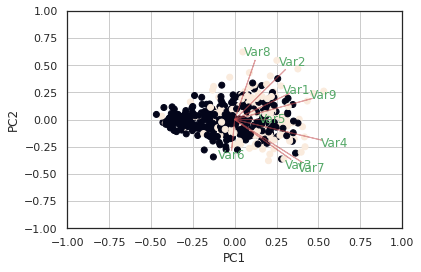

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_2 = copy.deepcopy(X)

# In general, it's a good idea to scale the data prior to PCA.
scaler = StandardScaler()
scaler.fit(X_2)
X_2 = scaler.transform(X_2)    
pca = PCA()
x_new = pca.fit_transform(X_2)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()


Drugim sposobem na wyplotowanie wektorów własnych oraz wartości własnych jest skorzystanie z biblioteki 'pca'. Pierwsza metoda jest jednak prostsza do zrozumienia, nie wymaga dodatkowych bibliotek i wydaje się być mniej uciążliwa w codziennej pracy.

Zastanówmy się teraz ile komponentów PCA potrzebujemy.

In [14]:
pca = PCA()
x_new = pca.fit(X)
features = range(pca.n_components_)

Wyplotujmy wariancję.

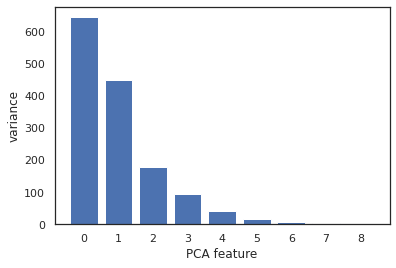

In [15]:
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.ylabel("variance")
plt.xlabel("PCA feature")
plt.show()

In [16]:
pca.explained_variance_

array([6.44757999e+02, 4.48650106e+02, 1.77993388e+02, 9.51670852e+01,
       4.10042092e+01, 1.59182673e+01, 6.08345407e+00, 3.34968423e+00,
       2.24951075e-01])

Przyjmijmy, że możemy wyrzucić pięć ostatnich PCA featurów, ponieważ ich wariancja nie przekracza 5.

Jesteśmy gotowi więc zaprezentować finalny rezultat:

In [17]:
pca_best = PCA(n_components=4).fit(X)
columns = ['pca_comp_%i' % i for i in range(4)]
index = X.index
df_pca = pd.DataFrame(pca_best.transform(X), columns=columns, index=index)
df_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2,pca_comp_3
0,81.538506,17.765249,2.883356,5.799825
1,-6.447841,-19.474324,-14.344034,-3.981960
2,-18.844583,7.062463,-14.254970,-0.260361
3,24.245042,-29.461343,-1.948063,-0.246019
4,35.675699,19.822693,-7.931635,-6.521364


Oto finalna ramka gotowa pod potencjalne klastrowanie!